In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier

## Importing sklearn packages!!

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA

In [70]:
df = pd.read_csv('/content/datasets_729058_1265963_Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


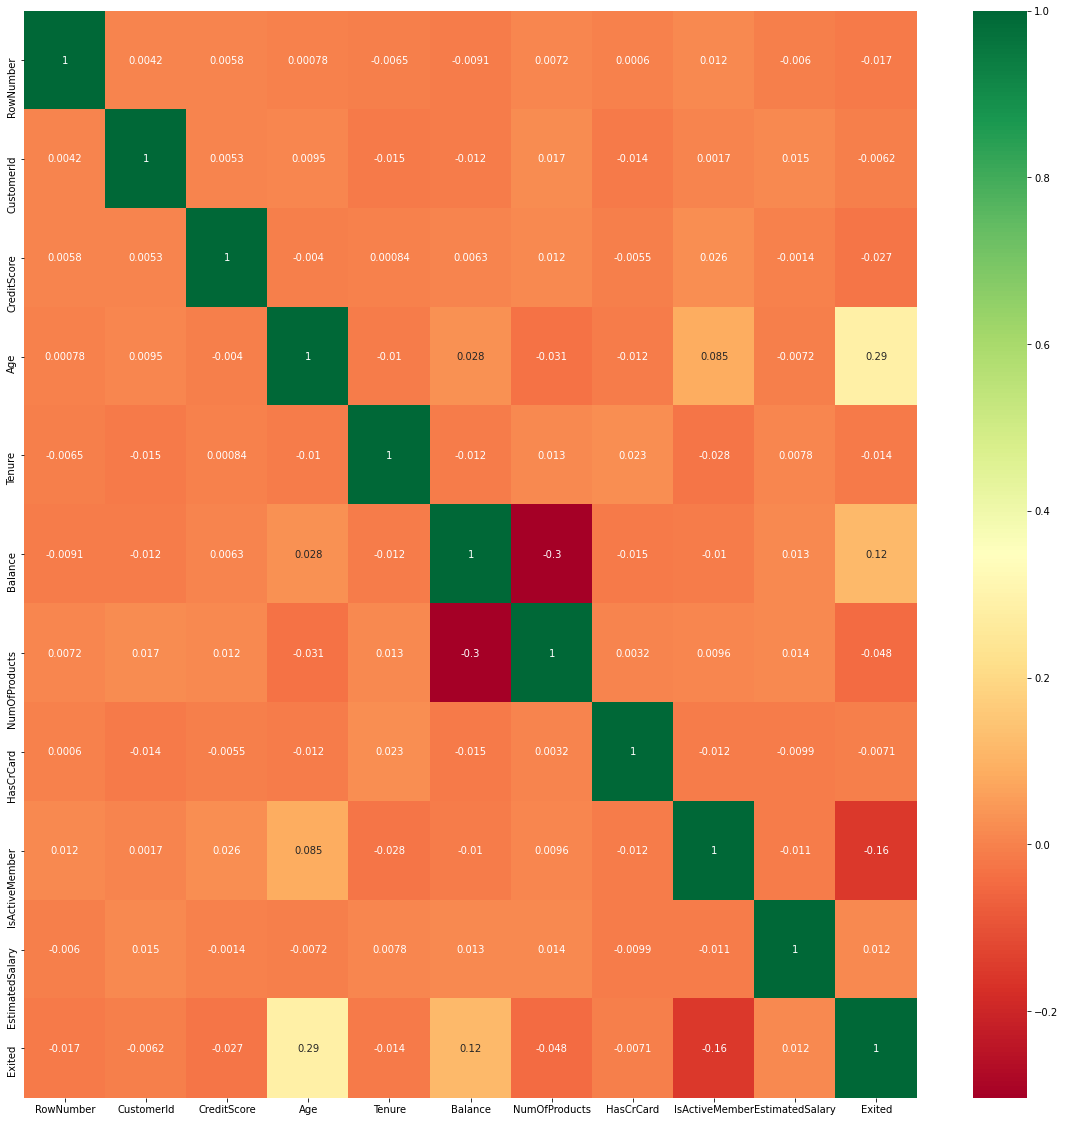

In [71]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]


In [73]:
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [74]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [75]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [76]:
X=X.drop(['Geography','Gender'],axis=1)

In [77]:
X=pd.concat([X,geography,gender],axis=1)

In [78]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.02,random_state=0)

In [80]:
classifier = XGBClassifier()

In [81]:
grid_params = [{'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
                'max_depth' : [1,2,3,4,5,6],
                'gamma' : [0.0,0.1,0.2,0.3,0.5],
                'min_child_weight' : [1,3,5,7,8],
                'colsample_bytree' : [0.1,0.2,0.3,0.4,0,5]
                }]

Rand_search = RandomizedSearchCV(estimator=classifier,
                                 param_distributions = grid_params,
                                 n_iter = 5,
                                 scoring = 'roc_auc',
                                 n_jobs = -1,
                                 cv = 10,
                                 verbose = 2 
                                 )

Rand_search.fit(X_train,y_train)
y_predict = Rand_search.predict(X_test)
best_accuracy = Rand_search.best_score_
best_parameters = Rand_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


Best Accuracy: 86.13 %
Best Parameters: {'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4}


[[148   4]
 [ 20  28]]


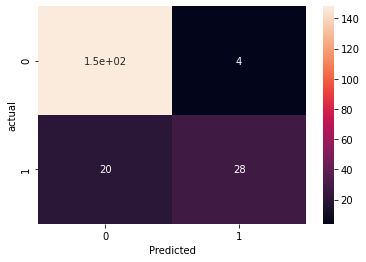

In [83]:
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.ylabel('actual')
plt.xlabel('Predicted')
plt.show()
